In [34]:
import pandas as pd
import scipy
import seaborn as sns
import numpy as np
import statsmodels.api

In [3]:
df2 = pd.read_csv('/home/borislav/Загрузки/5_task_2.csv')

In [4]:
df1 = pd.read_csv('/home/borislav/Загрузки/5_task_1.csv')

In [5]:
df1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [6]:
df2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [20]:
groupA = df1.query('group == "A"').events
groupB = df1.query('group == "B"').events
groupC = df1.query('group == "C"').events

In [21]:
scipy.stats.levene(groupA, groupB, groupC)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [22]:
scipy.stats.f_oneway(groupA,groupB,groupC)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

<AxesSubplot:>

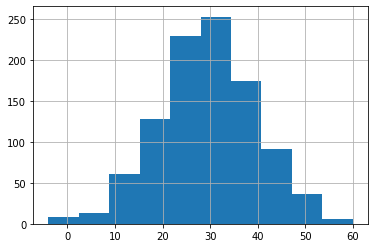

In [25]:
groupA.sample(1000, random_state=17).hist()

<AxesSubplot:>

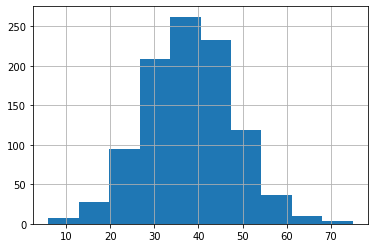

In [27]:
groupB.sample(1000, random_state = 17).hist()

<AxesSubplot:>

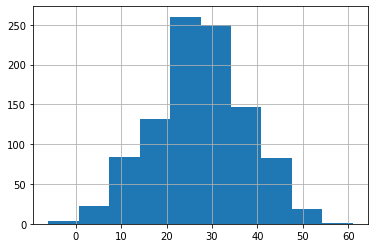

In [28]:
groupC.sample(1000, random_state= 17).hist()

In [36]:
statsmodels.stats.multicomp.pairwise_tukeyhsd(df1.events, groups = df1.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,-0.0,7.7038,8.3642,True
A,C,-2.1093,-0.0,-2.4395,-1.7791,True
B,C,-10.1433,-0.0,-10.4735,-9.8131,True


In [37]:
groupA.mean()

29.5796

In [38]:
groupB.mean()

37.6136

In [39]:
groupC.mean()

27.4703

In [52]:
control = df2.query("group == 'control'")

In [51]:
test = df2.query('group == "test"')

/home/borislav/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='events', ylabel='Density'>

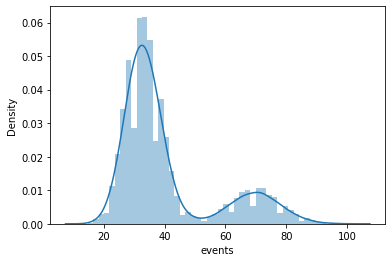

In [54]:
sns.distplot(test.events)

/home/borislav/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='events', ylabel='Density'>

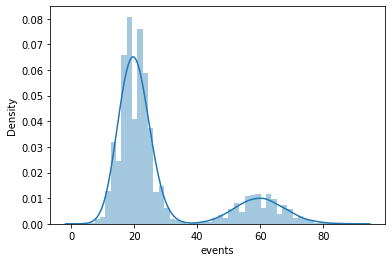

In [55]:
sns.distplot(control.events)

In [57]:
test.groupby(['segment', 'group'])['events'].agg(['mean', 'median', 'std'])

,,mean,median,std
segment,group,,,
high,test,69.938500,70.0,8.403974
low,test,33.025925,33.0,5.720845


In [58]:
control.groupby(['segment', 'group'])['events'].agg(['mean', 'median', 'std'])

,,mean,median,std
segment,group,,,
high,control,59.970800,60.0,7.805347
low,control,20.031575,20.0,4.473576


In [80]:
x = statsmodels.formula.api.ols(formula='events ~ segment + group + segment:group', data= df2).fit()


In [81]:
statsmodels.stats.anova.anova_lm(x, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
segment,1.0,2.362480e+07,2.362480e+07,689756.377484,0.000000e+00
group,1.0,3.837195e+06,3.837195e+06,112031.864119,0.000000e+00
segment:group,1.0,3.664244e+04,3.664244e+04,1069.823273,2.060261e-233
Residual,99996.0,3.424956e+06,3.425093e+01,NaN,NaN


In [77]:
df2['combination'] = df2['group'] + '/' + df2['segment']

In [79]:
df2

,id,group,segment,events,combination
0,83440,test,high,78.0,test/high
1,96723,test,high,71.0,test/high
2,68719,test,high,80.0,test/high
3,50399,test,high,80.0,test/high
4,95613,test,high,78.0,test/high
...,...,...,...,...,...
99995,60695,control,low,15.0,control/low
99996,5934,control,low,16.0,control/low
99997,30046,control,low,22.0,control/low
99998,26474,control,low,21.0,control/low


In [82]:
statsmodels.stats.multicomp.pairwise_tukeyhsd(df2.events, groups=df2.combination).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control/high,control/low,-39.9392,-0.0,-40.1073,-39.7711,True
control/high,test/high,9.9677,-0.0,9.7551,10.1803,True
control/high,test/low,-26.9449,-0.0,-27.113,-26.7768,True
control/low,test/high,49.9069,-0.0,49.7388,50.075,True
control/low,test/low,12.9944,-0.0,12.888,13.1007,True
test/high,test/low,-36.9126,-0.0,-37.0807,-36.7445,True
